El objetivo de esta notebook es poder predecir a partir de informacion contenida en datasets de IMDB (https://www.imdb.com) si una pelicula en produccion va a ser bien recibida o mal recibida por el publico.

Importamos las principales librerias:

In [1]:
import pandas as pd
import numpy as np

Definimos los datasets que vamos a utilizar:

In [2]:
# local
data_location = "./data_name_basics.tsv"
data_location1 = "./data_title_akas.tsv"
data_location2 = "./data_title_basics.tsv"
data_location3 = "./data_title_crew.tsv"
data_location4 = "./data_title_principals.tsv"
data_location5 = "./data_title_ratings.tsv"



El primer dataset contiene informacion sobre los directores:

In [3]:
tsv_file = open(data_location, encoding="UTF8")
data = pd.read_csv(tsv_file, delimiter="\t", low_memory=False)
data.head(3)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0053137,tt0031983,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0117057,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0059956,tt0057345,tt0049189,tt0054452"


In [4]:
name_basics = data

El segundo dataset contiene informacion sobre todos los distintos titulos en imdb:

In [6]:
tsv_file = open(data_location2, encoding="UTF8")
data2 = pd.read_csv(tsv_file, delimiter="\t", low_memory=False)
data2.head(3)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"


El tercer dataset muestra el ID de cada pelicula junto con el ID su respectivo director:

In [7]:
tsv_file = open(data_location3, encoding="UTF8")
data3 = pd.read_csv(tsv_file, delimiter="\t", low_memory=False)
data3.head(3)

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N


El cuarto dataset muestra informacion sobre ID's de directores, productores, etc., asociados al ID de cada pelicula:

In [8]:
tsv_file = open(data_location4, encoding="UTF8")
data5 = pd.read_csv(tsv_file, delimiter="\t", low_memory=False)
data5.head(3)

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N


El quinto dataset muestra para el ID de cada pelicula, su rating y el numero de votos:

In [9]:
tsv_file = open(data_location5, encoding="UTF8")
data6 = pd.read_csv(tsv_file, delimiter="\t", low_memory=False)
data6.head(3)

,tconst,averageRating,numVotes
0,tt0000001,5.7,1677
1,tt0000002,6.1,208
2,tt0000003,6.5,1399


Ahora vamos a llamar a nuestro segundo dataset que contiene informacion sobre los titulos:

In [12]:
data2.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,short,Miss Jerry,Miss Jerry,0,1894,\N,40,"Romance,Short"
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


Vemos el numero de columnas y filas:

In [13]:
data2.shape

(7538053, 9)

Vemos el tipo de dato de cada columna:

In [14]:
data2.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

Vemos los valores de la columna "titleType":

In [15]:
data2.titleType.value_counts()

tvEpisode       5458746
short            789189
movie            565079
video            292468
tvSeries         199863
tvMovie          112756
tvMiniSeries      35385
tvSpecial         31124
videoGame         27162
tvShort           26278
episode               1
audiobook             1
radioSeries           1
Name: titleType, dtype: int64

Como hay muchos tipos de titulos distintos, y a nosotros solo nos interesan las peliculas, vamos a crear una mascara para poder filtrar por peliculas y la aplicamos:

In [16]:
mask_movie = data2.titleType == 'movie'
df_m = data2[mask_movie]

Corroboramos que el numero de filas haya disminuido:

In [17]:
df_m.shape

(565079, 9)

Vemos que valores tiene la columna "startYear":

In [18]:
df_m["startYear"].value_counts()

\N      69649
2017    17709
2018    17467
2016    17388
2019    16673
        ...  
1902        4
2027        4
2026        3
2028        1
1897        1
Name: startYear, Length: 133, dtype: int64

Notamos que la columna "startYear" tiene como valor "\N", por lo cual vamos a crear y aplicar una mascara para poder filtrar esos casos:

In [19]:
mask_year = df_m["startYear"] != "\\N"
df_sin_n = df_m[mask_year]

Verificamos que esas filas ya no se encuentren en el nuevo dataframe:

In [20]:
df_sin_n["startYear"].value_counts()

2017    17709
2018    17467
2016    17388
2019    16673
2015    16261
        ...  
2027        4
2025        4
2026        3
1897        1
2028        1
Name: startYear, Length: 132, dtype: int64

Convertimos a int a la columna y verificamos:

In [21]:
df_sin_n["startYear"] = df_sin_n["startYear"].astype(int) 

D:\Anaconda3\envs\dhdsblend_1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_sin_n["startYear"].dtypes

dtype('int32')

Calculamos la cantidad de columnas y filas de este dataframe actualizado:

In [23]:
df_sin_n.shape

(495430, 9)

Como el objetivo trata a cerca de peliculas en produccion actualmente, solo nos interesa quedarnos con inputs que no sean demasiado antiguos, por lo cual solo nos vamos a limitar a trabajar con peliculas creadas a partir de 1960. Para eso vamos a crear una mascara y aplicarla al dataframe:

In [24]:
mask_year = df_sin_n["startYear"] > 1959
df_sin_n_1960 = df_sin_n[mask_year]

Verificamos que el numero de filas haya disminuido y hacemos un display de este nuevo dataframe:

In [25]:
df_sin_n_1960.shape


(403950, 9)

In [26]:
df_sin_n_1960.head(20)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
15184,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000,\N,60,\N
15492,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,102,"Drama,Mystery,Romance"
16662,tt0016906,movie,Frivolinas,Frivolinas,0,2014,\N,80,"Comedy,Musical"
19706,tt0019996,movie,Hongxia,Hongxia,0,2011,\N,94,\N
30909,tt0031458,movie,El huésped del sevillano,El huésped del sevillano,0,1970,\N,86,Comedy
34811,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,118,"Comedy,Fantasy,Romance"
35943,tt0036574,movie,"January 30, 1945",30. Januar 1945,0,1965,\N,146,\N
35975,tt0036606,movie,"Another Time, Another Place","Another Time, Another Place",0,1983,\N,118,"Drama,War"
38019,tt0038687,movie,Let There Be Light,Let There Be Light,0,1980,\N,58,"Documentary,War"
38767,tt0039442,movie,"Habla, mudita","Habla, mudita",0,1973,\N,88,Drama


Ahora dropeamos la columna "endYear" ya que no aporta informacion util y llamamos al dataframe nuevamente:

In [27]:
df_sin_n_1960 = df_sin_n_1960.drop(axis=1, columns='endYear')

In [28]:
df_sin_n_1960.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
15184,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000,60,\N
15492,tt0015724,movie,Dama de noche,Dama de noche,0,1993,102,"Drama,Mystery,Romance"
16662,tt0016906,movie,Frivolinas,Frivolinas,0,2014,80,"Comedy,Musical"
19706,tt0019996,movie,Hongxia,Hongxia,0,2011,94,\N
30909,tt0031458,movie,El huésped del sevillano,El huésped del sevillano,0,1970,86,Comedy
34811,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,118,"Comedy,Fantasy,Romance"
35943,tt0036574,movie,"January 30, 1945",30. Januar 1945,0,1965,146,\N
35975,tt0036606,movie,"Another Time, Another Place","Another Time, Another Place",0,1983,118,"Drama,War"
38019,tt0038687,movie,Let There Be Light,Let There Be Light,0,1980,58,"Documentary,War"
38767,tt0039442,movie,"Habla, mudita","Habla, mudita",0,1973,88,Drama


Creamos y aplicamos una mascara que permita filtrar en todas las columnas a las celdas que valgan "\N":

In [29]:
mask_N = df_sin_n_1960 != "\\N"
df_sin_n_1960_N = df_sin_n_1960[mask_N]

D:\Anaconda3\envs\dhdsblend_1\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Ahora creamos un loop que para convertir a los valores "\N" en NaN y llamamos al dataframe:

In [30]:
for columns in df_sin_n_1960_N.columns:
    for f in columns:
        if f == "\\N":
            f = np.NaN

In [31]:
df_sin_n_1960_N.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
15184,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000,60,NaN
15492,tt0015724,movie,Dama de noche,Dama de noche,0,1993,102,"Drama,Mystery,Romance"
16662,tt0016906,movie,Frivolinas,Frivolinas,0,2014,80,"Comedy,Musical"
19706,tt0019996,movie,Hongxia,Hongxia,0,2011,94,NaN
30909,tt0031458,movie,El huésped del sevillano,El huésped del sevillano,0,1970,86,Comedy
34811,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,118,"Comedy,Fantasy,Romance"
35943,tt0036574,movie,"January 30, 1945",30. Januar 1945,0,1965,146,NaN
35975,tt0036606,movie,"Another Time, Another Place","Another Time, Another Place",0,1983,118,"Drama,War"
38019,tt0038687,movie,Let There Be Light,Let There Be Light,0,1980,58,"Documentary,War"
38767,tt0039442,movie,"Habla, mudita","Habla, mudita",0,1973,88,Drama


Vemos el procentaje de valores nulos por columna en el dataframe y el tipo de dato de cada columna:

In [32]:
nulos = df_sin_n_1960_N.isnull().sum()/df_sin_n_1960_N.shape[0]*100
nulos

tconst             0.000000
titleType          0.000000
primaryTitle       0.000000
originalTitle      0.000000
isAdult            0.000000
startYear          0.000000
runtimeMinutes    24.740191
genres            10.606758
dtype: float64

In [33]:
df_sin_n_1960_N.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear          int32
runtimeMinutes    object
genres            object
dtype: object

Creamos un nuevo dataframe donde estan solo los valores no nulos y tambien verificamos que haya disminuido el numero de filas:

In [34]:
data_filas_completas = df_sin_n_1960_N.dropna()
print(df_sin_n_1960_N.shape)
print(data_filas_completas.shape)

(403950, 8)
(284922, 8)


In [35]:
data_filas_completas.isna().sum()

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
runtimeMinutes    0
genres            0
dtype: int64

Renombramos este ultimo dataframe y lo llamamos "title_basics":

In [36]:
title_basics = data_filas_completas

Ahora crearemos un indice que utilizaremos mas adelante a partir de la columna "tconst" de este dataframe (el ID de cada pelicula):

In [37]:
indice = title_basics["tconst"]#Ω

In [38]:
indice

15492      tt0015724
16662      tt0016906
30909      tt0031458
34811      tt0035423
35975      tt0036606
             ...    
7537816    tt9916362
7537901    tt9916538
7537942    tt9916622
7537969    tt9916680
7538003    tt9916754
Name: tconst, Length: 284922, dtype: object

Ahora creamos el dataframe "ratings" a partir del dataframe que posee datos sobre el puntaje de cada pelicula, y vemos cuantas columnas y filas tiene:

In [39]:
ratings = data6
ratings.shape

(1114606, 3)

In [40]:
ratings.head(20)

,tconst,averageRating,numVotes
0,tt0000001,5.7,1677
1,tt0000002,6.1,208
2,tt0000003,6.5,1399
3,tt0000004,6.2,123
4,tt0000005,6.2,2196
5,tt0000006,5.3,120
6,tt0000007,5.4,671
7,tt0000008,5.4,1847
8,tt0000009,6.0,155
9,tt0000010,6.9,6179


Creamos un nuevo dataframe "ratings_indice" que surge de la combinacion entre "ratings" e "indice" y donde como maximo solo van a aparecer los ratings de las peliculas que quedaron luego de nuestros filtros anteriores:

In [41]:
ratings_indice = pd.merge(ratings, indice, how="inner", on=["tconst"])

Vemos el tamaño de este dataframe y lo llamamos:

In [42]:
ratings_indice.shape

(195173, 3)

In [43]:
ratings_indice

,tconst,averageRating,numVotes
0,tt0015724,6.2,20
1,tt0016906,5.6,15
2,tt0031458,7.1,8
3,tt0035423,6.4,78892
4,tt0036606,6.5,258
...,...,...,...
195168,tt9916160,6.5,42
195169,tt9916190,3.2,132
195170,tt9916270,5.7,836
195171,tt9916362,5.8,192


Ahora vamos a llamar a otros datasets que contienen informacion sobre los directores que trabajaron en las peliculas y datos en detalle acerca de cada una de ellas:

In [44]:
crew = data3
principals = data5

In [45]:
crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [46]:
principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


Vemos cuales son los valores de la columna "category" en dataset sobre las peliculas:

In [47]:
principals["category"].value_counts()

actor                  9759180
self                   7451693
actress                7324717
writer                 5612259
director               4901865
producer               2615884
cinematographer        1520513
composer               1506136
editor                 1425812
production_designer     309368
archive_footage         259868
archive_sound             2746
Name: category, dtype: int64

Teniendo en cuenta la importancia de la direccion en las peliculas y dado el gran numero de actores y actrices en el reparto, solo propondremos trabajar con los directores de cada pelicula. Para eso vamos a crear una mascara y la vamos a aplicar:

In [48]:
directores_mask = (principals["category"] == "director")
staff = principals[directores_mask]

Verificamos que el numero de filas haya disminuido:

In [49]:
print(principals.shape)
print(staff.shape)

(42690041, 6)
(4901865, 6)


Creamos un nuevo dataframe "staff_indice" que surge de la combinacion entre "staff" e "indice":

In [50]:
staff_indice = pd.merge(staff, indice, how="inner", on=["tconst"])

Como hay columnas que no aportan informacion util y/o tienen NaN's vamos a eliminarlas y volveremos a llamar al dataframe:

In [51]:
staff_indice = staff_indice.drop(columns=["job","characters","ordering"])

In [52]:
staff_indice.shape

(292176, 3)

In [53]:
staff_indice.head()

,tconst,nconst,category
0,tt0015724,nm0529960,director
1,tt0016906,nm0136068,director
2,tt0031458,nm0649563,director
3,tt0035423,nm0003506,director
4,tt0036606,nm0705535,director


Ahora hacemos un merge entre el dataframe que habiamos creado inicialmente "title_basics", y "ratings_indice":

In [54]:
title_ratings = pd.merge(title_basics, ratings_indice, on='tconst')


Verificamos que el rating aparezca en este nuevo dataframe:

In [55]:
title_ratings

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0015724,movie,Dama de noche,Dama de noche,0,1993,102,"Drama,Mystery,Romance",6.2,20
1,tt0016906,movie,Frivolinas,Frivolinas,0,2014,80,"Comedy,Musical",5.6,15
2,tt0031458,movie,El huésped del sevillano,El huésped del sevillano,0,1970,86,Comedy,7.1,8
3,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,118,"Comedy,Fantasy,Romance",6.4,78892
4,tt0036606,movie,"Another Time, Another Place","Another Time, Another Place",0,1983,118,"Drama,War",6.5,258
...,...,...,...,...,...,...,...,...,...,...
195168,tt9916160,movie,Drømmeland,Drømmeland,0,2019,72,Documentary,6.5,42
195169,tt9916190,movie,Safeguard,Safeguard,0,2020,90,"Action,Adventure,Thriller",3.2,132
195170,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,84,Thriller,5.7,836
195171,tt9916362,movie,Coven,Akelarre,0,2020,90,"Action,Adventure,Drama",5.8,192


Ahora dropeamos la columna 'category':

In [56]:
staff_sinc = staff_indice.drop(['category'], axis=1)

In [57]:
staff_sinc

,tconst,nconst
0,tt0015724,nm0529960
1,tt0016906,nm0136068
2,tt0031458,nm0649563
3,tt0035423,nm0003506
4,tt0036606,nm0705535
...,...,...
292171,tt9916622,nm9272490
292172,tt9916622,nm9272491
292173,tt9916680,nm0652213
292174,tt9916754,nm9272490


In [58]:
mask_staff_sind = staff_sinc['tconst'].drop_duplicates(keep= "first")


In [59]:
mask_staff_sind

0         tt0015724
1         tt0016906
2         tt0031458
3         tt0035423
4         tt0036606
            ...    
292169    tt9916362
292170    tt9916538
292171    tt9916622
292173    tt9916680
292174    tt9916754
Name: tconst, Length: 260477, dtype: object

Ahora realizamos un merge entre los dataframes staff_sinc y title_ratings a partir de 'tconst':

In [61]:
imdb =title_ratings.merge(staff_sinc, on = 'tconst', validate = "many_to_many")
imdb 


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,nconst
0,tt0015724,movie,Dama de noche,Dama de noche,0,1993,102,"Drama,Mystery,Romance",6.2,20,nm0529960
1,tt0016906,movie,Frivolinas,Frivolinas,0,2014,80,"Comedy,Musical",5.6,15,nm0136068
2,tt0031458,movie,El huésped del sevillano,El huésped del sevillano,0,1970,86,Comedy,7.1,8,nm0649563
3,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,118,"Comedy,Fantasy,Romance",6.4,78892,nm0003506
4,tt0036606,movie,"Another Time, Another Place","Another Time, Another Place",0,1983,118,"Drama,War",6.5,258,nm0705535
...,...,...,...,...,...,...,...,...,...,...,...
203348,tt9916160,movie,Drømmeland,Drømmeland,0,2019,72,Documentary,6.5,42,nm5684093
203349,tt9916190,movie,Safeguard,Safeguard,0,2020,90,"Action,Adventure,Thriller",3.2,132,nm7308376
203350,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,84,Thriller,5.7,836,nm1480867
203351,tt9916362,movie,Coven,Akelarre,0,2020,90,"Action,Adventure,Drama",5.8,192,nm1893148


In [62]:
crew.head(3)

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N


Arreglamos el dataframe para poder trabajar con el mas adelante:

In [64]:
imdb ['tconst'].unique().shape

(182223,)

In [65]:
strip = imdb .genres.apply(lambda x: x.replace(' ', ''))

In [66]:
imdb.genres = strip

In [67]:
imdb 

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,nconst
0,tt0015724,movie,Dama de noche,Dama de noche,0,1993,102,"Drama,Mystery,Romance",6.2,20,nm0529960
1,tt0016906,movie,Frivolinas,Frivolinas,0,2014,80,"Comedy,Musical",5.6,15,nm0136068
2,tt0031458,movie,El huésped del sevillano,El huésped del sevillano,0,1970,86,Comedy,7.1,8,nm0649563
3,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,118,"Comedy,Fantasy,Romance",6.4,78892,nm0003506
4,tt0036606,movie,"Another Time, Another Place","Another Time, Another Place",0,1983,118,"Drama,War",6.5,258,nm0705535
...,...,...,...,...,...,...,...,...,...,...,...
203348,tt9916160,movie,Drømmeland,Drømmeland,0,2019,72,Documentary,6.5,42,nm5684093
203349,tt9916190,movie,Safeguard,Safeguard,0,2020,90,"Action,Adventure,Thriller",3.2,132,nm7308376
203350,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,84,Thriller,5.7,836,nm1480867
203351,tt9916362,movie,Coven,Akelarre,0,2020,90,"Action,Adventure,Drama",5.8,192,nm1893148


Para poder continuar y modelar vamos a crear dummies a partir de la columna genero:

In [68]:
imdb_dum = imdb.genres.str.join(sep='').str.get_dummies(sep=',')

In [69]:
imdb_dum

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203348,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
203349,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
203350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
203351,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Unimos este ultimo dataframe con el dataframe anterior, imdb:

In [70]:
imdb_condumgen =imdb.join(imdb_dum)
imdb_condumgen

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,tt0015724,movie,Dama de noche,Dama de noche,0,1993,102,"Drama,Mystery,Romance",6.2,20,...,0,0,1,0,0,0,0,0,0,0
1,tt0016906,movie,Frivolinas,Frivolinas,0,2014,80,"Comedy,Musical",5.6,15,...,0,0,0,0,0,0,0,0,0,0
2,tt0031458,movie,El huésped del sevillano,El huésped del sevillano,0,1970,86,Comedy,7.1,8,...,0,0,0,0,0,0,0,0,0,0
3,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,118,"Comedy,Fantasy,Romance",6.4,78892,...,0,0,1,0,0,0,0,0,0,0
4,tt0036606,movie,"Another Time, Another Place","Another Time, Another Place",0,1983,118,"Drama,War",6.5,258,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203348,tt9916160,movie,Drømmeland,Drømmeland,0,2019,72,Documentary,6.5,42,...,0,0,0,0,0,0,0,0,0,0
203349,tt9916190,movie,Safeguard,Safeguard,0,2020,90,"Action,Adventure,Thriller",3.2,132,...,0,0,0,0,0,0,0,1,0,0
203350,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,84,Thriller,5.7,836,...,0,0,0,0,0,0,0,1,0,0
203351,tt9916362,movie,Coven,Akelarre,0,2020,90,"Action,Adventure,Drama",5.8,192,...,0,0,0,0,0,0,0,0,0,0


In [71]:
imdb_condumgen["nconst"]

0         nm0529960
1         nm0136068
2         nm0649563
3         nm0003506
4         nm0705535
            ...    
203348    nm5684093
203349    nm7308376
203350    nm1480867
203351    nm1893148
203352    nm4457074
Name: nconst, Length: 203353, dtype: object

Vamos a droppear las peliculas que se encuentran repetidas ya que solo nos vamos a concentrar en utilizar como input al director principal y no al secundario para asi evitar trabajar con demasiadas variables en exceso:

In [72]:
imdb_2=imdb_condumgen.drop_duplicates(keep='first', subset='tconst')
imdb_2.shape

(182223, 38)

In [73]:
nconst_filtro = imdb_2["nconst"]

Ahora realizamos un merge entre el dataframe anterior y el dataset que contiene informacion acerca de los directores:

In [74]:
imdb_2 = imdb_2.merge(name_basics,how="inner",on=["nconst"])


In [75]:
imdb_2.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes',
       'nconst', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
       'Thriller', 'War', 'Western', 'primaryName', 'birthYear', 'deathYear',
       'primaryProfession', 'knownForTitles'],
      dtype='object')

In [76]:
name_basics.head(3)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0053137,tt0031983,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0117057,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0059956,tt0057345,tt0049189,tt0054452"


Para poder realizar un analisis no sesgado vamos a utilizar como aceptable a los ratings (que serviran para definir a nuestra variable a predecir) que tengan al menos 1.000 votos por el publico. Para eso creamos una mascara y la aplicamos:

In [2]:
imdb_2["numVotes"].value_counts(normalize=True)

NameError: name 'imdb_2' is not defined

In [78]:
imdb_2["numVotes"].mean()

4404.473156517015

In [79]:
mask_votos = imdb_2.numVotes > 1000

In [80]:
imdb_mas50 = imdb_2[mask_votos]

In [81]:
imdb_mas50 = imdb_mas50.drop(["tconst", "titleType","primaryTitle","originalTitle", "genres"], axis= 1)

In [82]:
for n in imdb_mas50['averageRating']:
    n=int(n)
       

In [83]:
imdb_mas50['averageRating']

16        6.4
17        6.8
18        6.9
19        7.3
20        7.3
         ... 
182119    6.9
182127    6.4
182158    7.1
182173    7.8
182176    8.0
Name: averageRating, Length: 28302, dtype: float64

In [87]:
imdb_mas50['averageRating']

16        6.4
17        6.8
18        6.9
19        7.3
20        7.3
         ... 
182119    6.9
182127    6.4
182158    7.1
182173    7.8
182176    8.0
Name: averageRating, Length: 28302, dtype: float64

In [88]:
imdb_mas50['averageRating'].unique()

array([6.4, 6.8, 6.9, 7.3, 7.8, 7.7, 6.3, 6.7, 8.1, 7.1, 5.9, 5.7, 7. ,
       6.5, 6.6, 7.4, 7.2, 7.6, 6.2, 5.8, 6.1, 4.7, 4.6, 5.4, 8.7, 5.2,
       4.4, 5.1, 3.5, 5.6, 7.5, 4.5, 8. , 7.9, 6. , 5.5, 8.2, 4.9, 5.3,
       5. , 4. , 8.3, 4.8, 4.2, 4.1, 3.2, 3.3, 3.6, 4.3, 3.9, 8.8, 8.4,
       8.9, 2.6, 2.9, 3.8, 8.5, 3. , 2.3, 8.6, 2.5, 3.1, 2.2, 3.7, 2.1,
       2.7, 9.2, 9. , 1.8, 2. , 1.7, 1.9, 3.4, 1.3, 1.1, 1.4, 2.8, 2.4,
       9.3, 1.5, 1.6, 9.1, 1.2, 1. , 9.4])

Definimos las categorias que utilizaremos de la siguiente manera: si el rating es menor o igual a 6 entonces sera una pelicula mala, si es superior entonces sera buena. Originalmente la intencion era crear mas escenarios para las clasificaciones, pero debido al procesamiento que requeria la notebook para procesar, debimos disminuir las categorias:

In [89]:
Clasificacion=[]

for x in imdb_mas50['averageRating']:
    if x<=6:
        Clasificacion.append(0)
    else:
        Clasificacion.append(1)
#     if x<=2:
#         Clasificacion.append(0)
#     elif x<=4:
#         Clasificacion.append(1)
#     elif x<=6:
#         Clasificacion.append(2)
#     elif x<=8:
#         Clasificacion.append(3)
#     elif x<=10:
#         Clasificacion.append(4)


In [90]:
Clasificacion=pd.Series(Clasificacion)
Clasificacion

0        1
1        1
2        1
3        1
4        1
        ..
28297    1
28298    1
28299    1
28300    1
28301    1
Length: 28302, dtype: int64

In [91]:
imdb_mas50['Clasificacion']=Clasificacion.values

In [92]:
imdb_mas50.columns

Index(['isAdult', 'startYear', 'runtimeMinutes', 'averageRating', 'numVotes',
       'nconst', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
       'Thriller', 'War', 'Western', 'primaryName', 'birthYear', 'deathYear',
       'primaryProfession', 'knownForTitles', 'Clasificacion'],
      dtype='object')

In [93]:
print(imdb_mas50[['averageRating', 'Clasificacion']])

        averageRating  Clasificacion
16                6.4              1
17                6.8              1
18                6.9              1
19                7.3              1
20                7.3              1
...               ...            ...
182119            6.9              1
182127            6.4              1
182158            7.1              1
182173            7.8              1
182176            8.0              1

[28302 rows x 2 columns]


In [94]:
imdb_mas50['Clasificacion'].isnull().sum()

0

Dropeamos columnas porque no tienen ningun registro o no tienen utilidad en adelante:

In [95]:

imdb_mas50 = imdb_mas50.drop(columns = ["Game-Show","Reality-TV","Talk-Show"])


In [96]:
imdb_mas50.columns

Index(['isAdult', 'startYear', 'runtimeMinutes', 'averageRating', 'numVotes',
       'nconst', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western', 'primaryName',
       'birthYear', 'deathYear', 'primaryProfession', 'knownForTitles',
       'Clasificacion'],
      dtype='object')

In [97]:
imdb_mas50 = imdb_mas50.drop(columns=['numVotes', 'birthYear', 'deathYear', 'birthYear', 'primaryProfession', 'knownForTitles', 'deathYear',
       'primaryProfession', 'knownForTitles'])

In [98]:
imdb_mas50.columns

Index(['isAdult', 'startYear', 'runtimeMinutes', 'averageRating', 'nconst',
       'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi',
       'Short', 'Sport', 'Thriller', 'War', 'Western', 'primaryName',
       'Clasificacion'],
      dtype='object')

Creamos dummies para cada uno de los directores asi los podremos utilizar en los modelos:

In [100]:

one_hot = pd.get_dummies(imdb_mas50['nconst'])

In [101]:
one_hot.shape

(28302, 12136)

Ahora creamos el ultimo dataframe antes de poder comenzar a modelar:

In [102]:

data_df = imdb_mas50.drop('nconst',axis = 1)

In [103]:

data_df = data_df.join(one_hot)
data_df 

,isAdult,startYear,runtimeMinutes,averageRating,Action,Adult,Adventure,Animation,Biography,Comedy,...,nm9753309,nm9813479,nm9825418,nm9921790,nm9928566,nm9942830,nm9955408,nm9955426,nm9957570,nm9985593
16,0,2001,118,6.4,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
17,0,1995,105,6.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,1997,105,6.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,1999,127,7.3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20,0,2003,90,7.3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182119,0,2019,84,6.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182127,0,2019,92,6.4,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
182158,0,2020,97,7.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182173,0,2019,96,7.8,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
data_df.isnull().sum()

isAdult           0
startYear         0
runtimeMinutes    0
averageRating     0
Action            0
                 ..
nm9942830         0
nm9955408         0
nm9955426         0
nm9957570         0
nm9985593         0
Length: 12166, dtype: int64

In [119]:
data_df.columns

Index(['isAdult', 'startYear', 'runtimeMinutes', 'averageRating', 'Action',
       'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       ...
       'nm9753309', 'nm9813479', 'nm9825418', 'nm9921790', 'nm9928566',
       'nm9942830', 'nm9955408', 'nm9955426', 'nm9957570', 'nm9985593'],
      dtype='object', length=12166)

Definimos las variables dependientes e independientes. Si bien en principio se intento agregar mas variables como escritores, actores y actrices, la gran cantidad de variables que habia provoco errores de falta de memoria, por lo cual debimos reducir el numero de variables independientes:

In [120]:
X = data_df.drop(["Clasificacion","averageRating","primaryName"], axis=1)
y = data_df["Clasificacion"]

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

Comenzamos utilizando un modelo de Kneighbors:

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [123]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train);

In [124]:
y_pred = knn.predict(X_test)

In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7056246466930469

In [126]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[1159 1375]
 [ 708 3834]]


In [127]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2']))


Weighted Precision: 0.69
Weighted Recall: 0.71
Weighted F1-score: 0.69

Classification Report

              precision    recall  f1-score   support

     Class 1       0.62      0.46      0.53      2534
     Class 2       0.74      0.84      0.79      4542

    accuracy                           0.71      7076
   macro avg       0.68      0.65      0.66      7076
weighted avg       0.69      0.71      0.69      7076



Continuamos con una regresion logistica:

In [128]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_std, y_train)

LogisticRegression(max_iter=2000)

In [129]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [130]:
accuracy_score(y_test, lr.predict(X_test))

0.358111927642736

In [131]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, lr.predict(X_test))
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[2534    0]
 [4542    0]]


In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, lr.predict(X_test), average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, lr.predict(X_test), average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, lr.predict(X_test), average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, lr.predict(X_test), target_names=['Class 1', 'Class 2']))

D:\Anaconda3\envs\dhdsblend_1\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Weighted Precision: 0.13
Weighted Recall: 0.36
Weighted F1-score: 0.19

Classification Report

              precision    recall  f1-score   support

     Class 1       0.36      1.00      0.53      2534
     Class 2       0.00      0.00      0.00      4542

    accuracy                           0.36      7076
   macro avg       0.18      0.50      0.26      7076
weighted avg       0.13      0.36      0.19      7076



D:\Anaconda3\envs\dhdsblend_1\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Utilizamos Grid search para evaluar mas resultados:

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

In [135]:
pasos = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]

In [136]:
pipe = Pipeline(pasos)

In [137]:
param_grid = {'knn__n_neighbors':range(2,20,2),'knn__weights':['uniform','distance']}

In [138]:
grid = GridSearchCV(pipe, param_grid, cv=folds)
grid.fit(X_train, y_train)

In [139]:
##########pipe.fit(X_train,y_train)

In [140]:
grid.score(X_test,y_test)

In [141]:
accuracy_score(grid.predict(X_test),y_test)

Ahora analizaremos el clustering pero droppeando las variables respectivas de los directores, debido a problemas de procesamiento y de memoria:

In [142]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, grid.predict(X_test))
print('Confusion Matrix\n')
print(confusion)

In [143]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, grid.predict(X_test), average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, grid.predict(X_test), average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, grid.predict(X_test), average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, grid.predict(X_test), target_names=['Class 1', 'Class 2']))

In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [145]:
scaler=StandardScaler()
X=scaler.fit_transform(imdb_mas50.drop(["Clasificacion","averageRating","primaryName"], axis=1))
 

In [146]:
inertia=[]
sil=[]
ch_scores=[]
k_values=range(2,40,2)

for k in k_values:
    print(k)
    km=KMeans(n_clusters=k)
    km.fit(X)
    inertia.append(km.inertia_) 

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38


In [3]:
plt.plot(k_values,inertia);
plt.vlines(16,np.min(inertia),np.max(inertia),linestyle='dashed');
plt.xlabel('Numero de clusters (k)',fontsize=15);plt.ylabel('Inertia',fontsize='15')

NameError: name 'plt' is not defined

In [1]:
k=16;
km=KMeans(n_clusters=k,random_state=0)
km.fit(X)

pca=PCA(n_components=2)
X_transformed=pca.fit_transform(X)
#plt.figure(figsize=(250,100))
sns.scatterplot(X_transformed[:,0],X_transformed[:,1],hue=km.labels_,palette='Dark2')
fig = plt.gcf()
fig.set_size_inches( 35, 35);

NameError: name 'KMeans' is not defined

Generamos el grafico de clusters y vemos que se puede visualizar verticalmente distintos clusters, aunque es probable que utilizando una mayor cantidad de variables independientes estos clusters se vean mas definidos:

In [ ]:
k=16;
km=KMeans(n_clusters=k,random_state=0)
km.fit(X)

pca=PCA(n_components=2)
X_transformed=pca.fit_transform(X)
#plt.figure(figsize=(250,100))
sns.scatterplot(X_transformed[:,0],X_transformed[:,1],hue=km.labels_,palette='Dark2')

Finalmente, realizamos un grafico de barras que muestra cual es el promedio del rating para cada genero:

In [163]:
imdb.genres.value_counts().head(10)

Drama                   35105
Documentary             24596
Comedy                  16283
Comedy,Drama             7216
Drama,Romance            5810
Horror                   5421
Comedy,Romance           3545
Comedy,Drama,Romance     3265
Thriller                 3100
Action                   2475
Name: genres, dtype: int64

In [197]:
imdb.genres.value_counts().head(10).index

Index(['Drama', 'Documentary', 'Comedy', 'Comedy,Drama', 'Drama,Romance',
       'Horror', 'Comedy,Romance', 'Comedy,Drama,Romance', 'Thriller',
       'Action'],
      dtype='object')

In [229]:
mask_genres = [(imdb["genres"] == "Drama") | (imdb["genres"] == "Documentary")  | (imdb.genres == 'Comedy') | (imdb.genres == 'Comedy,Drama') | (imdb.genres == 'Drama,Romance') | (imdb["genres"] == 'Horror') | (imdb.genres == 'Comedy,Romance') | (imdb.genres == 'Comedy,Drama,Romance') | (imdb.genres == 'Thriller') | (imdb.genres == 'Action')]

In [247]:
diezprimerosgeneros = imdb.genres.value_counts().head(10).index

In [236]:
mask_drama = imdb["genres"] == "Drama"
prom_1 = imdb[mask_drama].averageRating.mean()

In [237]:
mask_Documentary = imdb["genres"] == "Documentary"
prom_2 = imdb[mask_Documentary].averageRating.mean()

In [238]:
mask_Comedy = imdb["genres"] == "Comedy"
prom_3 = imdb[mask_Comedy].averageRating.mean()

In [239]:
mask_Comedy_Drama = imdb["genres"] == "Comedy,Drama"
prom_4 =imdb[mask_Comedy_Drama].averageRating.mean()

In [248]:
mask_Drama_Romance = imdb["genres"] == "Drama,Romance"
prom_5 =imdb[mask_Drama_Romance].averageRating.mean()

In [249]:
mask_Horror = imdb["genres"] == "Horror"
prom_6 =imdb[mask_Horror].averageRating.mean()

In [250]:
mask_Comedy_Romance = imdb["genres"] == "Comedy,Romance"
prom_7 =imdb[mask_Comedy_Romance].averageRating.mean()

In [251]:
mask_Comedy_Drama_Romance = imdb["genres"] == "Comedy,Drama,Romance"
prom_8 =imdb[mask_Comedy_Romance].averageRating.mean()

In [252]:
mask_Thriller = imdb["genres"] == "Thriller"
prom_9 =imdb[mask_Thriller].averageRating.mean()

In [253]:
mask_Action = imdb["genres"] == "Action"
prom_10 =imdb[mask_Action].averageRating.mean()

In [254]:
promedios = [prom_1, prom_2, prom_3, prom_4, prom_5, prom_6, prom_7, prom_8, prom_9, prom_10]

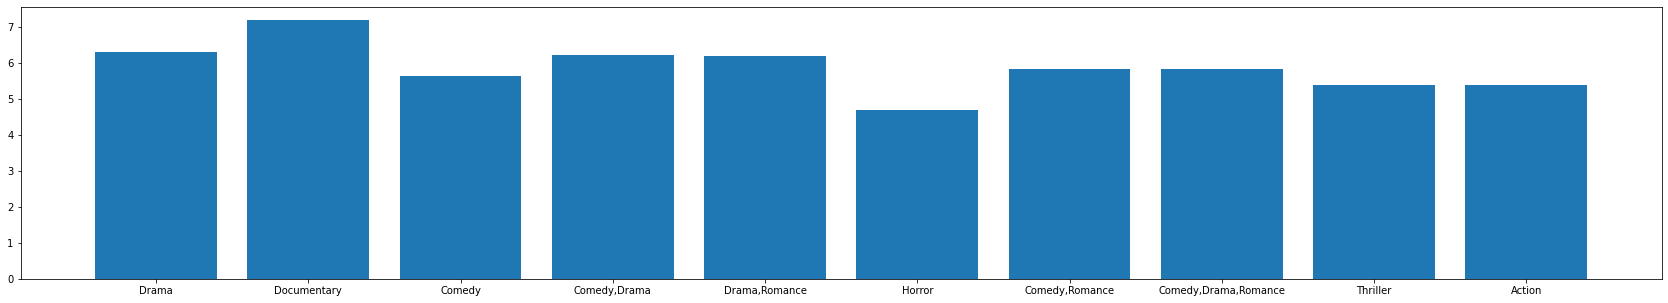

In [257]:
generos = diezprimerosgeneros

plt.figure(figsize=(100, 5))

plt.subplot(131)
plt.bar(generos, promedios)
plt.show()